<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/%D0%94%D0%97_02_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

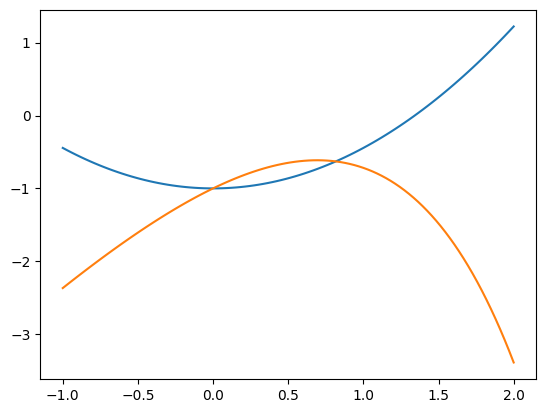

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import math

x= np.linspace(-1, 2, 100)

def f1(x):
    return x**2/3**2 + x**2/(3/2)**2 - 1

def f2(x):
    return a * x - np.exp(x) - x

y1 = f1(x)
y2 = f2(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [28]:


global a
a = 3

def fun_1(x):
    f = x[0] ** 2 / a ** 2 + x[1] ** 2 / (a / 2) ** 2 - 1
    return f

def d_fun_1(x):
    df0 = 2 * x[0] / a ** 2
    df1 = 2 * x[1] / (a / 2) ** 2
    return df0, df1

def fun_2(x):
    f = a * x[1] - np.exp(x[0]) - x[0]
    return f

def d_fun_2(x):
    df0 = - np.exp(x[0]) -1
    df1 = a
    return df0, df1

def Jac(x):
    df1 = d_fun_1(x)
    df2 = d_fun_2(x)
    Jac = np.array([[df1[0], df1[1]], [df2[0], df2[1]]])
    return Jac

def delta(x, f):
    J = Jac(x)
    delta = np.linalg.solve(J, -f)
    return delta

def zero_estimate():
    l = np.array([0.75, 1])
    r = np.array([0.1, 1.63])
    x_0 = (l + r) * 0.5
    return l, r, x_0

def norm(x_cur, x_nex):
    norm = math.sqrt((x_nex[0] - x_cur[0]) ** 2 + (x_nex[1] - x_cur[1]) ** 2)
    return norm

def Newton(eps):
    l, r, x_cur = zero_estimate()
    f = np.array([fun_1(x_cur), fun_2(x_cur)])
    x_nex = x_cur + delta(x_cur, f)
    i = 1
    while norm(x_cur, x_nex) > eps:
        x_cur = x_nex
        f = np.array([fun_1(x_cur), fun_2(x_cur)])
        x_nex = x_cur + delta(x_cur, f)
        i += 1
    return x_nex, i

def fun_1_s(x):
    f = (math.sqrt(abs(- x[1] ** 2 / ((a / 2) ** 2) + 1))) / a
    return f

def fun_2_s(x):
    f = (np.exp(x[0]) + x[0]) / a
    return f

def d_fun_1_s(x):
    df = - 1 / (a ** 4) * math.sqrt(abs(1 - (x[1] / (a / 2)) ** 2))
    return df

def d_fun_2_s(x):
    df = (np.exp(x[0]) + 1) / a
    return df

def df_matrix(x):
    df = [[0, d_fun_1_s(x)], [d_fun_2_s(x), 0]]
    return df

def norm_s(x):
    n = [abs(d_fun_1_s(x)), abs(d_fun_2_s(x))]
    return n

def SimplIt(eps):
    l, r, x_cur = zero_estimate()
    q = max(norm_s(l), norm_s(r))
    x_nex = np.array([fun_1_s(x_cur), fun_2_s(x_cur)])
    i = 1
    check = [q[0] / (1 - q[0]), q[1] / (1 - q[1])] * abs(x_nex - x_cur)
    while (check[0] > eps) and (check[1] > eps):
        x_cur = x_nex
        x_nex = np.array([fun_1_s(x_cur), fun_2_s(x_cur)])
        i += 1
        check = [q[0] / (1 - q[0]), q[1] / (1 - q[1])] * abs(x_nex - x_cur)
    return x_nex, i






def main():
    # x1^2/a^2 + x2^2/(a/2)^2 - 1 = 0
    # a*x2 - exp(x1) -x1 = 0
    # a = 3
    eps = 0.00001
    print('Метод Ньютона: ')
    print('Корни: ', Newton(eps)[0])
    print('Итераций: ', Newton(eps)[1])
    print('Метод Простых Итераций: ')
    print('Корни: ', SimplIt(eps)[0])
    print('Итераций: ', SimplIt(eps)[1])



if __name__ == "__main__":
    main()

Метод Ньютона: 
Корни:  [1.11780972 1.39198612]
Итераций:  5
Метод Простых Итераций: 
Корни:  [0.16036609 0.65153014]
Итераций:  1
